# Capstone Assignment 20.1: Initial Report and Exploratory Data Analysis (EDA)

**Overview**: In this module, we will work on performing exploratory data analysis (EDA) to develop an initial report for our capstone project. We will use EDA to see what data can reveal beyond the formal modeling, hypothesis testing task, and data training to provide a better understanding of dataset variables and the relationships between them. We will focus in cleaning our data and use feature engineering and EDA techniques to create visualizations to make sense of your findings. Additionally, we will use one of the ML algorithms you have learned so far in the program to develop a baseline model to use as a comparison in final Caption project.  

**Author:** Arturo Noguera

**Executive Summary:** Out there every customer has plenty of options for every aquisition , we need to streght our customer´s satisfaction and loyalty. At the same time we need to reduce the probability that competitors can take over our clients. Using Data Driven go to Market strategy, we will create product bundles with more attractive prices and promote synergy among different product business units to reduce production and marketing costs.

**Rationale:** Our approach to this challengue is get to know each customer´s "buying profile"  and target specific customers with higher probability to buy bundles from a broader portfolio vs individual products.

**Research Question:** Predict which customers have more probability to buy items from any category belonging to Product_Line_1 , given that they bought items from any category belonging to Product_Line_2.

**Data Sources:** 

Sales orders received by a large IT corporation from customers located in multiple regions adquiring products from Product_Line_1 and Product_Line_2.

Each product line includes Hardware and Software, has several sublines and each subline includes multiple SKUs. 

Customer is profield based in their Market Segment, Vertical Market, and Geographical region

This Dataset includes the net price for each individual transaction, during a full calendar year.

**Methodology**:Use cleaning and  feature engineering techniques along with multiple visualizations tools to define which parts of the received information is relevant to use it in the modeling stage.

### Import inital libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Read in inital sales data 

In [2]:
df = pd.read_csv('./Data/Bookings_24_25.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104813 entries, 0 to 104812
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_Line     84320 non-null  object 
 1   Product_Subline  84320 non-null  object 
 2   SKU              84320 non-null  object 
 3   Product_Class    84320 non-null  object 
 4   Market_Segment   84320 non-null  object 
 5   Vertical_Market  84320 non-null  object 
 6   Region           84320 non-null  object 
 7   Net_Price        84320 non-null  float64
 8   Customer_Hash    84320 non-null  object 
dtypes: float64(1), object(8)
memory usage: 7.2+ MB


### Customer´s identity was obfuscated to keep privacy

In [4]:
def sha256_hash(s: str):
    return hashlib.sha256(s.encode('utf-8')).hexdigest() 
#df['Customer_Hash'] = df[df['Customer'].notnull()]['Customer'].astype(str).apply(sha256_hash)
#df['Customer_Hash'].value_counts().head(20)
#df.drop(columns=['Customer'], inplace=True)


In [5]:
#df.Customer_Hash
df['Customer_Hash'].head()


0    f0d8152cf299f68973d14ad7f0847bc163550619e6c5db...
1    f23c02ca858a0fd43e399f7e63f7b50309964b4fb0c1ea...
2    bcef679da48c3e300b290412ea4d4056f34a35c140e06b...
3    cad2af5704bc21e50ed0f59d4c2b6c937ff01de6b363a2...
4    1717dd7b6a0126b8073f75f5265b9c25aa121f8537a706...
Name: Customer_Hash, dtype: object

### Sales Figures were scaled with a logarithmic transformation and encoded to keep the orignal sign

In [6]:
df.describe()

,Net_Price
count,84320.000
mean,2.135
std,12.058
min,-3249.196
25%,1.270
50%,3.217
75%,4.054
max,7.767


### Explore the data

**-From the Dataframe info, we can tell that there is no missing observations, However we find several "unknown" entries that we will review later**

In [7]:
df.head(20)

,Product_Line,Product_Subline,SKU,Product_Class,Market_Segment,Vertical_Market,Region,Net_Price,Customer_Hash
0,Product_Line_1,Product_Subline_1,SKU_1,Software,PUBLIC SECTOR,Education- Public/Private,GEO_1,2.107,f0d8152cf299f68973d14ad7f0847bc163550619e6c5db...
1,Product_Line_1,Product_Subline_1,SKU_1,Software,PUBLIC SECTOR,Transportation,GEO_1,3.261,f23c02ca858a0fd43e399f7e63f7b50309964b4fb0c1ea...
2,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Retail,GEO_2,3.566,bcef679da48c3e300b290412ea4d4056f34a35c140e06b...
3,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Manufacturing,GEO_2,3.575,cad2af5704bc21e50ed0f59d4c2b6c937ff01de6b363a2...
4,Product_Line_1,Product_Subline_1,SKU_1,Software,ENTERPRISE,Manufacturing,GEO_2,5.081,1717dd7b6a0126b8073f75f5265b9c25aa121f8537a706...
5,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Unknown,GEO_2,0.000,6506749abb9b646e7c202ff4a6a3870697775f622aa265...
6,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Technical Services,GEO_2,2.175,babe1056a867b55164db3b0d22b9ca744fed10a53008a6...
7,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Technical Services,GEO_2,0.524,dd6c7c1ad67c9abeca6af6533bf4085222ccea41af7553...
8,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Retail,GEO_2,4.338,57610d619a520d17f15dceff0e63f30b092ce62af54689...
9,Product_Line_1,Product_Subline_1,SKU_1,Software,SERVICE PROVIDER,Technical Services,GEO_2,0.834,987ae02ba862ce3e3c36a819604d753d5f43d3087c6c0c...


In [8]:
#number of unique values in each column
df.nunique()

Product_Line           2
Product_Subline        5
SKU                  137
Product_Class          2
Market_Segment         6
Vertical_Market       15
Region                 3
Net_Price          66415
Customer_Hash      19529
dtype: int64

In [9]:
#look at value counts for Product_Line
df["Product_Line"].value_counts()

Product_Line
Product_Line_1    65397
Product_Line_2    18923
Name: count, dtype: int64

In [10]:
#look at value counts for Product_Subline
df["Product_Subline"].value_counts()

Product_Subline
Product_Subline_5    21712
Product_Subline_1    21591
Product_Subline_2    18923
Product_Subline_4    11342
Product_Subline_3    10752
Name: count, dtype: int64

In [11]:
#look at value counts for SKU
df['SKU'].value_counts().head(10)

SKU
SKU_3     15872
SKU_4      7405
SKU_1      5012
SKU_9      4284
SKU_15     3748
SKU_30     2972
SKU_28     2957
SKU_29     2945
SKU_2      2850
SKU_17     2747
Name: count, dtype: int64

In [12]:
#look at value counts for Product_Class
df['Product_Class'].value_counts()

Product_Class
Software    70786
Hardware    13534
Name: count, dtype: int64

In [13]:
#look at value counts for Customer Market_Segment
df["Market_Segment"].value_counts()

Market_Segment
SMB                 26944
COMMERCIAL          25608
PUBLIC SECTOR       16239
ENTERPRISE           8488
SERVICE PROVIDER     3668
OTHER                3373
Name: count, dtype: int64

In [14]:
#look at value counts for Customer Vertical_Market
df["Vertical_Market"].value_counts()

Vertical_Market
Professional Services           11949
Financial Services              10355
Manufacturing                    9728
Government                       8421
Unknown                          7897
Technical Services               6360
Retail                           5464
Education- Public/Private        4922
WholeSale/Distribution           4357
Health Care                      4108
Service Provider                 2889
Media/Entertainment              2520
Transportation                   2284
Energy/Utilities                 2259
Hospitality/Hotels & Leisure      807
Name: count, dtype: int64

In [15]:
#look at value counts for Customer geography
df["Region"].value_counts()

Region
GEO_2    46482
GEO_1    25296
GEO_3    12542
Name: count, dtype: int64

In [16]:
#look at Net  Prices Stats
df['Net_Price'].describe()

count   84320.000
mean        2.135
std        12.058
min     -3249.196
25%         1.270
50%         3.217
75%         4.054
max         7.767
Name: Net_Price, dtype: float64

In [17]:
(df['Net_Price'] <=0).sum()

19024

In [18]:
#Before starting the Visualization section, we researched about the negative or Zero Net_Price
#Negative Prices are related to debookings or 'Product Returns'  by unsatisfied Customers
#Zero Net Prices are propomotions or 'gifts' to special customers
#We will get rid off these observations before any Data Evaluation and ignore its efect on the business objective.
df=df.drop(df[df['Net_Price']<=0].index)

In [19]:
(df['Net_Price'] <=0).sum()

0

In [20]:
# Look for 'unknown' Customers and Total Unique Customers
(df['Customer_Hash']=='UNKNOWN').sum()
df['Customer_Hash'].nunique()

1005

17044

### Visualizations from received Data

In [21]:
PL_counts=df['Product_Line'].value_counts().to_numpy()
PL_labels=df['Product_Line'].value_counts().index.to_numpy()

PS_counts=df['Product_Subline'].value_counts().to_numpy()
PS_labels=df['Product_Subline'].value_counts().index.to_numpy()


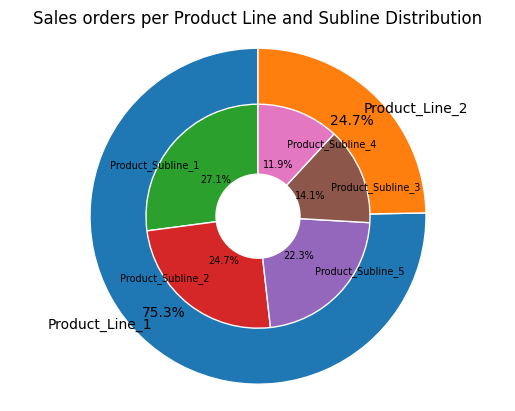

In [22]:
fig, ax = plt.subplots()
plt.title('Sales orders per Product Line and Subline Distribution')
ax.pie(PL_counts, labels=PL_labels, labeldistance=0.9, autopct='%1.1f%%', pctdistance=0.8, startangle=90,wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, radius=1.2)
ax.pie(PS_counts, labels=PS_labels, labeldistance=0.7,autopct='%1.1f%%',pctdistance=0.5, startangle=90,wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, textprops={'fontsize': 7},radius=0.8)
center_circle = plt.Circle((0, 0), 0.3, color='white')
fig.gca().add_artist(center_circle)
ax.axis('equal') 
plt.show();

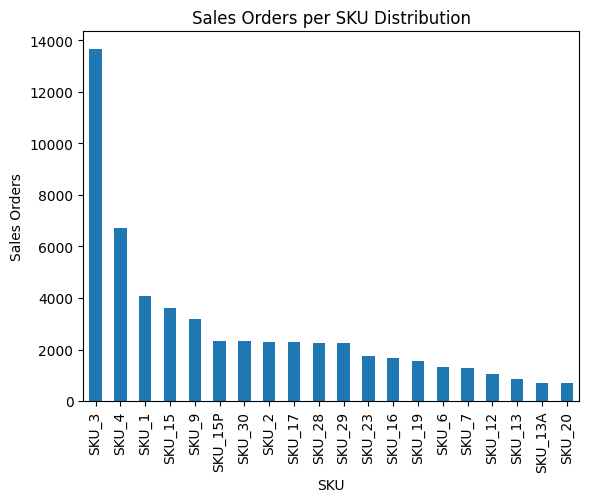

In [23]:
 #Sales Orders per SKU Distribution 

fig=df['SKU'].value_counts().head(20).plot(kind='bar')
fig.set_xlabel('SKU')
fig.set_ylabel('Sales Orders')
fig.set_title('Sales Orders per SKU Distribution');


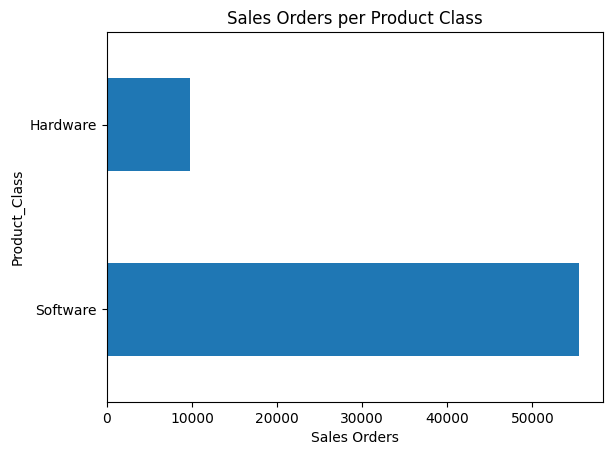

In [24]:
fig=df['Product_Class'].value_counts().plot(kind='barh',rot=0)
fig.set_xlabel('Sales Orders')
fig.set_ylabel('Product_Class')
fig.set_title('Sales Orders per Product Class');

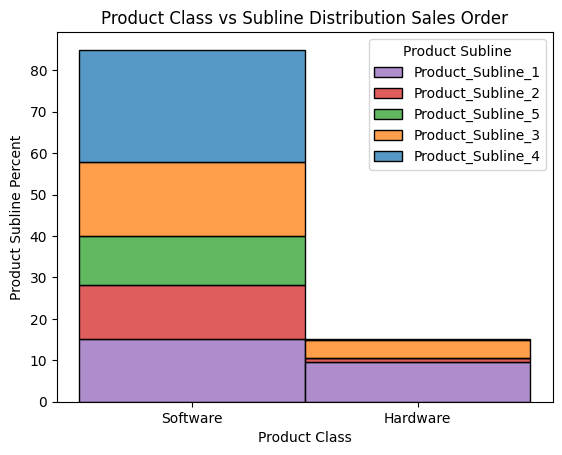

In [25]:
fig = sns.histplot(df, x='Product_Class', hue='Product_Subline',stat='percent',multiple='stack')
fig.set_xlabel('Product Class')
fig.set_ylabel('Product Subline Percent')
fig.legend(title='Product Subline',labels=PS_labels)
fig.set_title('Product Class vs Subline Distribution Sales Order');


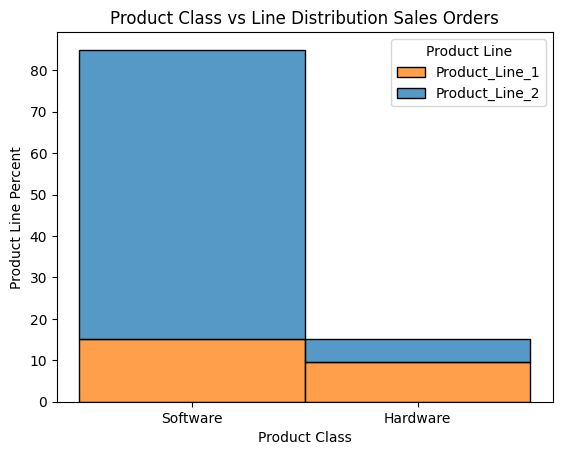

In [26]:
fig = sns.histplot(df, x='Product_Class', hue='Product_Line',stat='percent',multiple='stack')
fig.set_xlabel('Product Class')
fig.set_ylabel('Product Line Percent')
fig.legend(title='Product Line',labels=PL_labels)
fig.set_title('Product Class vs Line Distribution Sales Orders');


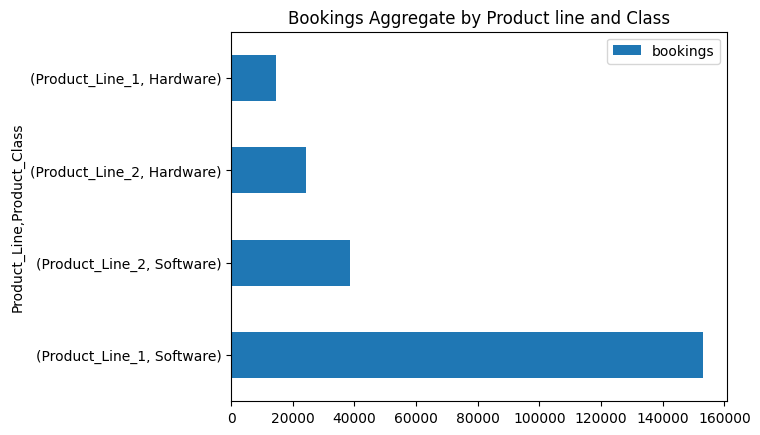

In [27]:
#get bar chart of bookings by product line and Class 
df.groupby(['Product_Line','Product_Class']).agg(
     bookings = ('Net_Price','sum'),
     ).sort_values(by="bookings", axis=0, ascending=False).head(20).plot(kind='barh',title='Bookings Aggregate by Product line and Class');

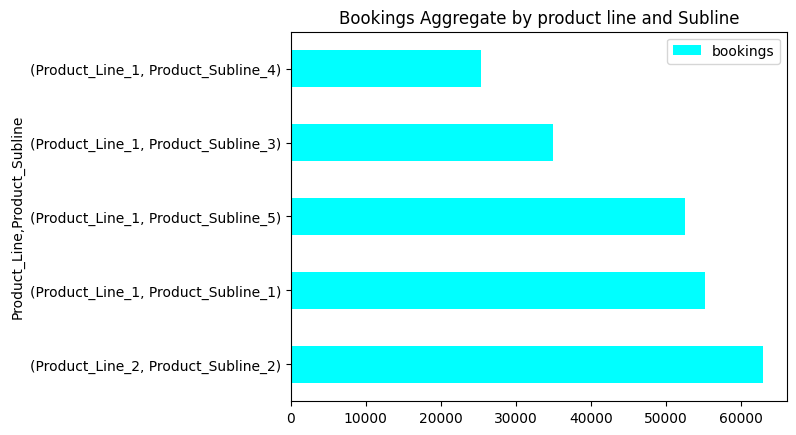

In [28]:
#get bar chart of bookings by Product Line and Subline
df.groupby(['Product_Line','Product_Subline']).agg(
     bookings = ('Net_Price','sum'),
     ).sort_values(by="bookings", axis=0, ascending=False).head(20).plot(kind='barh',colormap="cool",title='Bookings Aggregate by product line and Subline');

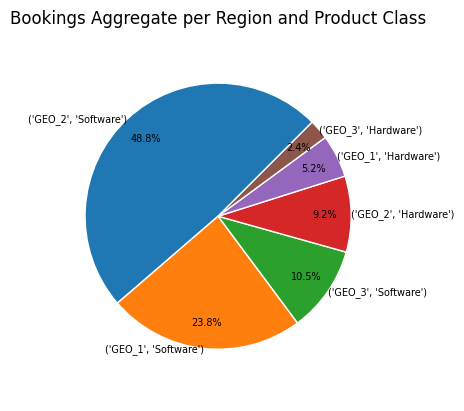

In [29]:
#get pie chart of bookings by Region and Product Class

df_group=df.groupby(['Region','Product_Class']).agg(
     bookings = ('Net_Price','sum'),
     ).sort_values(by="bookings", axis=0, ascending=False).head(20)

PL_labels=df_group.index
PL_counts=df_group['bookings'].to_numpy()
fig, ax = plt.subplots()

plt.title('Bookings Aggregate per Region and Product Class')
ax.pie(PL_counts, labels=PL_labels, labeldistance=1.0, autopct='%1.1f%%', pctdistance=0.8, startangle=45,wedgeprops={'linewidth': 1, 'edgecolor': 'white'},textprops={'fontsize': 7}, radius=0.9);


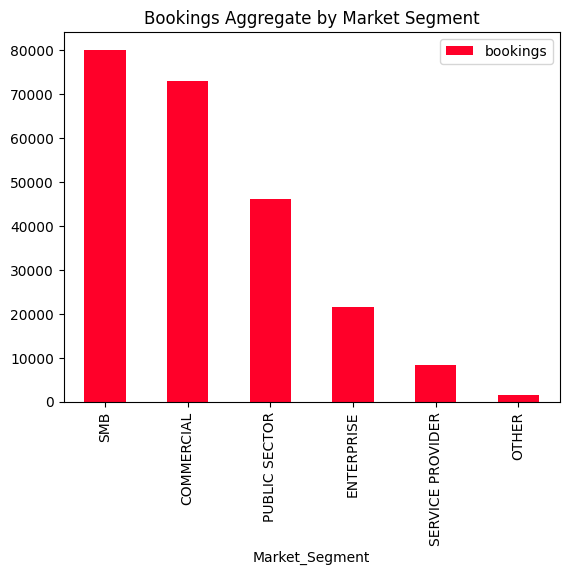

In [30]:
df.groupby(['Market_Segment']).agg(
     bookings = ('Net_Price','sum'),
     ).sort_values(by="bookings", axis=0, ascending=False).head(20).plot(kind='bar',colormap="gist_rainbow",title='Bookings Aggregate by Market Segment');

<Axes: title={'center': 'Bookings Aggregate by Vertical Market'}, ylabel='Vertical_Market'>

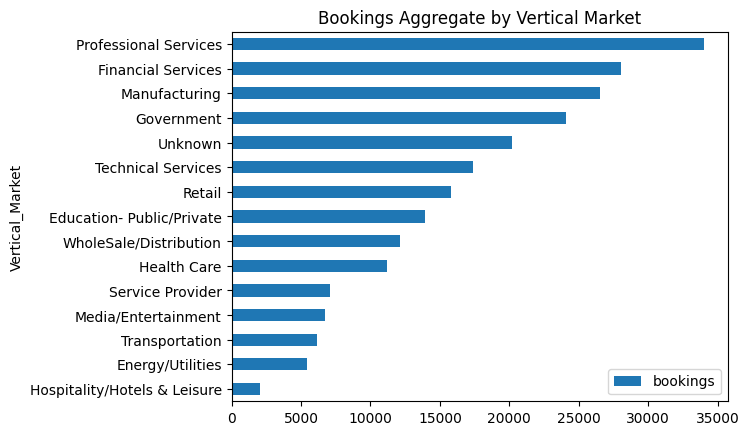

In [31]:
df.groupby(['Vertical_Market']).agg(
     bookings = ('Net_Price','sum'),
     ).sort_values(by="bookings", axis=0, ascending=True).head(30).plot(kind='barh', title='Bookings Aggregate by Vertical Market')

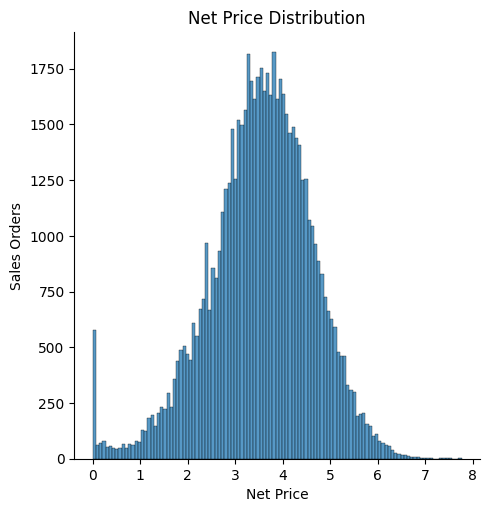

In [32]:
sns.displot(df['Net_Price']).set(title='Net Price Distribution', xlabel='Net Price', ylabel='Sales Orders');

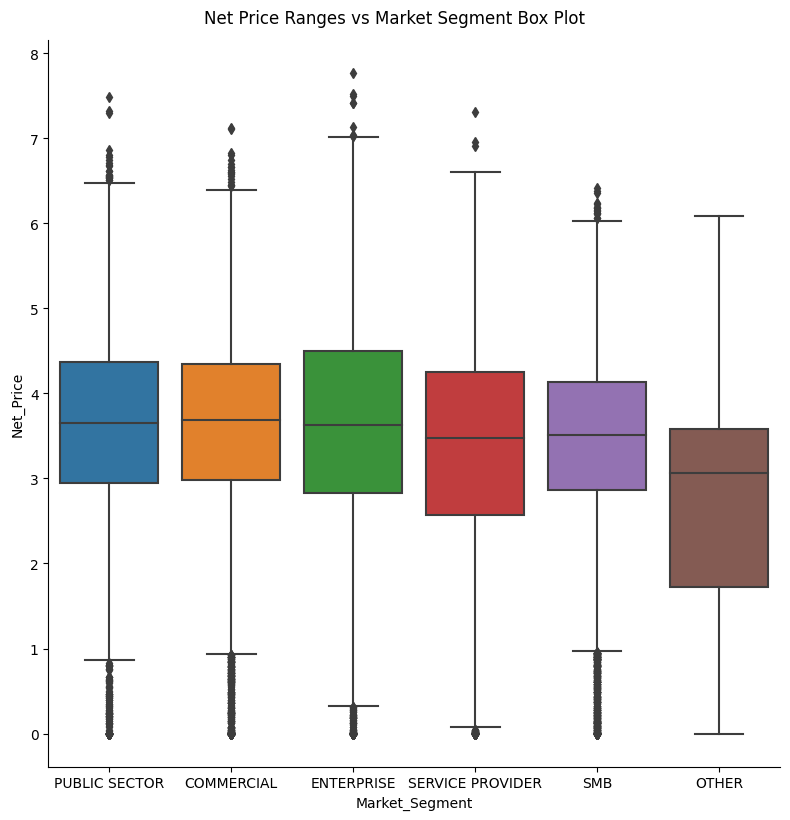

In [33]:
#box plot to see distribution of booking per region
sns.catplot(data=df, kind='box', x='Market_Segment', y='Net_Price', height=8)
plt.suptitle('Net Price Ranges vs Market Segment Box Plot', y=1.02);

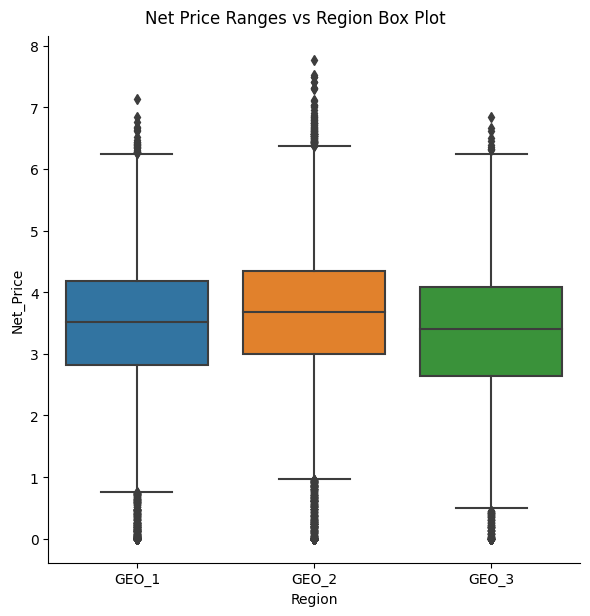

In [34]:
#box plot to see distribution of booking per region
sns.catplot(data=df, kind='box', x='Region', y='Net_Price', height=6)
plt.suptitle('Net Price Ranges vs Region Box Plot', y=1.02);

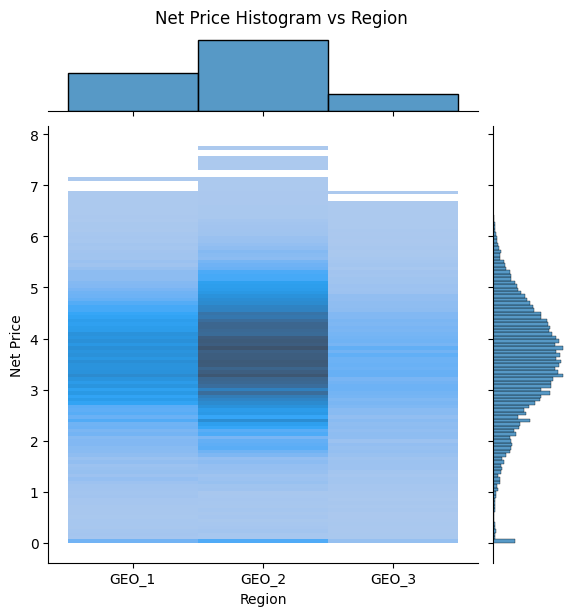

In [35]:
fig = sns.jointplot(df[['Region','Net_Price']], x='Region', y='Net_Price', kind='hist')
fig.set_axis_labels('Region','Net Price')
plt.suptitle('Net Price Histogram vs Region', y=1.02);

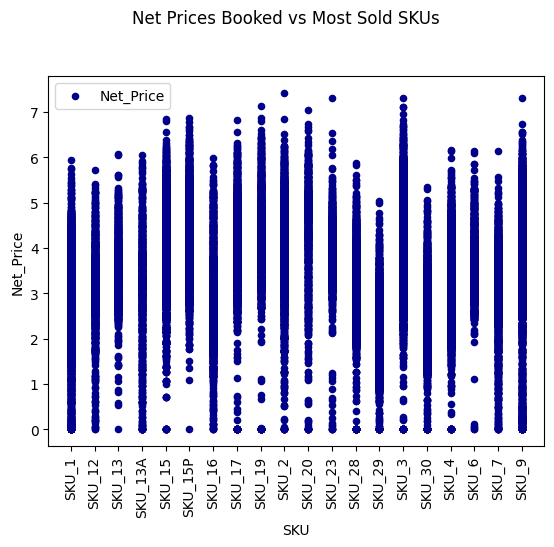

In [36]:
Best_SKUs=df['SKU'].value_counts().head(20).index.to_list()
df_query = df.query('SKU ==@Best_SKUs')

ax = df_query.plot.scatter(x="SKU", y="Net_Price", color="DarkBlue", label="Net_Price",rot=90)
plt.suptitle('Net Prices Booked vs Most Sold SKUs ', y=1.02);


### Data Cleaning and Preparation

In [37]:
#start to drop the rows with negative and zero bookings
#we did this step ahead to avoid the impact of negative numbers in the visualization phase.

#df=df.drop(df[df['Net_Price']<=0].index)

In [38]:
# Review our base line again
df.head()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.info()

,Product_Line,Product_Subline,SKU,Product_Class,Market_Segment,Vertical_Market,Region,Net_Price,Customer_Hash
0,Product_Line_1,Product_Subline_1,SKU_1,Software,PUBLIC SECTOR,Education- Public/Private,GEO_1,2.107,f0d8152cf299f68973d14ad7f0847bc163550619e6c5db...
1,Product_Line_1,Product_Subline_1,SKU_1,Software,PUBLIC SECTOR,Transportation,GEO_1,3.261,f23c02ca858a0fd43e399f7e63f7b50309964b4fb0c1ea...
2,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Retail,GEO_2,3.566,bcef679da48c3e300b290412ea4d4056f34a35c140e06b...
3,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Manufacturing,GEO_2,3.575,cad2af5704bc21e50ed0f59d4c2b6c937ff01de6b363a2...
4,Product_Line_1,Product_Subline_1,SKU_1,Software,ENTERPRISE,Manufacturing,GEO_2,5.081,1717dd7b6a0126b8073f75f5265b9c25aa121f8537a706...


<class 'pandas.core.frame.DataFrame'>
Index: 85789 entries, 0 to 104812
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_Line     65296 non-null  object 
 1   Product_Subline  65296 non-null  object 
 2   SKU              65296 non-null  object 
 3   Product_Class    65296 non-null  object 
 4   Market_Segment   65296 non-null  object 
 5   Vertical_Market  65296 non-null  object 
 6   Region           65296 non-null  object 
 7   Net_Price        65296 non-null  float64
 8   Customer_Hash    65296 non-null  object 
dtypes: float64(1), object(8)
memory usage: 6.5+ MB


In [39]:
#removing SKU from the data since there are 140 different products in our portfolio and only a few of them have significative count.
df = df.drop(['SKU'],axis=1)

In [40]:
#Customer ID is unique for each customer and is not relevant for the business purpose, however we can not drop it by now, 
#as it will be used to reorganize our data corpus.

#However it is safe to delete 'UNKNOWN' now, because these will converge in a single "customer" when we consolidate Sales Orders per customer

Unk_index = df[ (df['Customer_Hash'] == 'UNKNOWN')].index
df.drop(Unk_index , inplace=True)

In [41]:
#look for null values in bookings column
pd.isna(df["Net_Price"]).value_counts()

Net_Price
False    64291
True     20493
Name: count, dtype: int64

In [42]:
#Remember this feature was scaled using a Logarithmic transformer before having access to the raw Data and we have removed Net Prices <=0
df['Net_Price'].describe()
(df['Net_Price']).round(0).value_counts()

count   64291.000
mean        3.551
std         1.081
min         0.000
25%         2.914
50%         3.603
75%         4.274
max         7.767
Name: Net_Price, dtype: float64

Net_Price
4.000    23116
3.000    19715
5.000     9982
2.000     7426
6.000     1608
1.000     1517
0.000      847
7.000       78
8.000        2
Name: count, dtype: int64

In [43]:
#look at distribution of bookings by business sub entity
df.groupby('Product_Subline').agg({'Net_Price': ['mean', 'min', 'max']})
df.groupby('Market_Segment').agg({'Net_Price': ['mean', 'min', 'max']})

Net_Price            
                       mean   min   max
Product_Subline                        
Product_Subline_1     3.122 0.000 7.415
Product_Subline_2     3.909 0.000 7.300
Product_Subline_3     3.811 0.000 7.523
Product_Subline_4     3.268 0.000 7.492
Product_Subline_5     3.670 0.000 7.767

Net_Price            
                      mean   min   max
Market_Segment                        
COMMERCIAL           3.631 0.000 7.121
ENTERPRISE           3.618 0.000 7.767
OTHER                2.875 0.000 5.320
PUBLIC SECTOR        3.631 0.000 7.486
SERVICE PROVIDER     3.369 0.000 6.954
SMB                  3.453 0.000 6.411

**All Sales Orders seem to be smothly distributem among Product_sublines and Market Segments**

In [44]:
df.groupby('Product_Line').count().reset_index()

,Product_Line,Product_Subline,Product_Class,Market_Segment,Vertical_Market,Region,Net_Price,Customer_Hash
0,Product_Line_1,48304,48304,48304,48304,48304,48304,48304
1,Product_Line_2,15987,15987,15987,15987,15987,15987,15987


In [45]:
#Let us focus in Sales Order from "Product Line 2"
df.query('Product_Line=="Product_Line_2"')['Product_Subline'].value_counts()
#All these Sales orders belong to a single Subline "Product_Subline_2"
#so we can find all Customers buying "Product Line 2" filtering by "Product_Subline_2"

Product_Subline
Product_Subline_2    15987
Name: count, dtype: int64

In [46]:
#Look at Stats from Product_Subline_2
df.query('Product_Subline=="Product_Subline_2"').describe()

,Net_Price
count,15987.000
mean,3.909
std,0.774
min,0.000
25%,3.365
50%,3.873
75%,4.409
max,7.300


All Customers buying "Product Line 1", are distributed between "Product_Sublines" 1,3,4 and 5, as shown below

In [47]:
df.query('Product_Line=="Product_Line_1"')['Product_Subline'].value_counts()
df.query('Product_Line=="Product_Line_1"').describe()

Product_Subline
Product_Subline_1    17587
Product_Subline_5    13958
Product_Subline_3     9088
Product_Subline_4     7671
Name: count, dtype: int64

,Net_Price
count,48304.000
mean,3.433
std,1.140
min,0.000
25%,2.732
50%,3.480
75%,4.209
max,7.767


In [48]:
df.query('Product_Line=="Product_Line_1"').describe()
df.query('Product_Subline=="Product_Subline_2"').describe()

,Net_Price
count,48304.000
mean,3.433
std,1.140
min,0.000
25%,2.732
50%,3.480
75%,4.209
max,7.767


,Net_Price
count,15987.000
mean,3.909
std,0.774
min,0.000
25%,3.365
50%,3.873
75%,4.409
max,7.300


In [49]:
#new data frame to use to build along with table - did not keep columns that are not needed (Product Classification, Business Sub Entity, Business Entity)
df_new = df.groupby(['Customer_Hash','Market_Segment','Vertical_Market','Region'])['Net_Price'].mean().to_frame().reset_index()
df_new.shape
df_new.info()
df_new['Net_Price'].head()
df_new['Customer_Hash'].value_counts().head()

(21342, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21342 entries, 0 to 21341
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_Hash    21342 non-null  object 
 1   Market_Segment   21342 non-null  object 
 2   Vertical_Market  21342 non-null  object 
 3   Region           21342 non-null  object 
 4   Net_Price        21342 non-null  float64
dtypes: float64(1), object(4)
memory usage: 833.8+ KB


0   4.408
1   3.197
2   4.481
3   1.513
4   3.768
Name: Net_Price, dtype: float64

Customer_Hash
23759997b3c59884dc4c0ff5320d6301b0e7f63bf0f6483a7b54d7d43bc5ccd1    151
f67b0fd572d3859230f230dc8414485519bfd55cea1e52ff5159d33eed4bbfb5     28
dafafcc0517f1b5a45883e29e029288470fe42c5279773e3351c6a50f5ceb888     28
beca103a13e5a9b8b427ada2a12e5222dc61080d75ec0d995c72efae047c396c     28
b092e347f8c27e0ecfc19de24f3ed467343cb52e5f3b8adedd8438f892908f4b     27
Name: count, dtype: int64

In [50]:
#We will remove Customers with high numbers of sales orders, because these are most likeky resellers, 
#that buy large amounts of products to sell them to retail customers, and these would introduce noise in the modeling

In [51]:
df_new=df_new.sort_values(by=['Net_Price'],ascending=False ).drop_duplicates(subset=['Customer_Hash'], keep='last')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17043 entries, 16074 to 16135
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_Hash    17043 non-null  object 
 1   Market_Segment   17043 non-null  object 
 2   Vertical_Market  17043 non-null  object 
 3   Region           17043 non-null  object 
 4   Net_Price        17043 non-null  float64
dtypes: float64(1), object(4)
memory usage: 798.9+ KB


In [52]:
df_new['Customer_Hash'].value_counts().max()


1

After we aggregated  the mean Net_Price, some Customers with lots of Sales Orders show large Net_Prices, we will now drop the outliers.

In [53]:
(df_new['Net_Price']).round(0).value_counts()

Net_Price
4.000    6580
3.000    5835
5.000    1920
2.000    1816
1.000     393
0.000     287
6.000     207
7.000       5
Name: count, dtype: int64

In [54]:
Q1 = df_new['Net_Price'].quantile(0.25)
Q3 = df_new['Net_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df_clean = df_new.query('(Net_Price >= @lower_limit) & (Net_Price <= @upper_limit)')
df_clean.describe()
(df_clean['Net_Price']).round(0).value_counts()

,Net_Price
count,16495.000
mean,3.519
std,0.863
min,1.157
25%,2.965
50%,3.549
75%,4.099
max,5.850


Net_Price
4.000    6580
3.000    5835
5.000    1920
2.000    1816
1.000     215
6.000     129
Name: count, dtype: int64

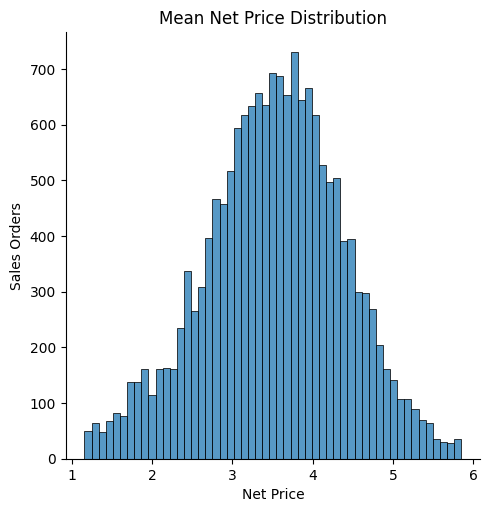

In [55]:
sns.displot(df_clean['Net_Price']).set(title='Mean Net Price Distribution', xlabel='Net Price', ylabel='Sales Orders');

In [56]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16495 entries, 20007 to 20852
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_Hash    16495 non-null  object 
 1   Market_Segment   16495 non-null  object 
 2   Vertical_Market  16495 non-null  object 
 3   Region           16495 non-null  object 
 4   Net_Price        16495 non-null  float64
dtypes: float64(1), object(4)
memory usage: 773.2+ KB


**Build pivot table to combine by customer so we can get our target variable (customers that buy Subline1 and one Subline2 products)**

In [57]:
#going to use business sub entity to derive target variable
table = pd.pivot_table(df, values='Net_Price', index=['Customer_Hash'],
                      columns=['Product_Subline'], aggfunc="mean")

In [58]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17043 entries, 000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301 to fffe40b62cee28596d1051876cc4eebf74571235ef02eae5f02b799d5c138b26
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Subline_1  9076 non-null   float64
 1   Product_Subline_2  6841 non-null   float64
 2   Product_Subline_3  5730 non-null   float64
 3   Product_Subline_4  3794 non-null   float64
 4   Product_Subline_5  5656 non-null   float64
dtypes: float64(5)
memory usage: 798.9+ KB


In [59]:
table.head()

Product_Subline,Product_Subline_1,Product_Subline_2,Product_Subline_3,Product_Subline_4,Product_Subline_5
Customer_Hash,,,,,
000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301,NaN,NaN,NaN,4.408,NaN
0005e7feb93c679c28814eacda65f194a5f0d949c0374b0d4bda8d7ceecdcbae,2.317,3.360,3.750,NaN,NaN
000637d7e3c727be6490413f3a28e857d16f54be469fcac56a80879a75dbe74d,4.481,NaN,NaN,NaN,NaN
00083d3d1c01000088b30d1ae5d912c2c8bc83ca74b0ef5b31043ba7db7ddabb,1.513,NaN,NaN,NaN,NaN
000cd92bf5b7d818165970b409aa183ebeb1d0270c871519324cc37a4dd96dc3,3.289,4.247,NaN,NaN,NaN


In [60]:
#add new column to test if customer buys Product_Line_2  0= no, 1 = yes
table['buys_PL2']=0

In [61]:
table.head()

Product_Subline,Product_Subline_1,Product_Subline_2,Product_Subline_3,Product_Subline_4,Product_Subline_5,buys_PL2
Customer_Hash,,,,,,
000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301,NaN,NaN,NaN,4.408,NaN,0
0005e7feb93c679c28814eacda65f194a5f0d949c0374b0d4bda8d7ceecdcbae,2.317,3.360,3.750,NaN,NaN,0
000637d7e3c727be6490413f3a28e857d16f54be469fcac56a80879a75dbe74d,4.481,NaN,NaN,NaN,NaN,0
00083d3d1c01000088b30d1ae5d912c2c8bc83ca74b0ef5b31043ba7db7ddabb,1.513,NaN,NaN,NaN,NaN,0
000cd92bf5b7d818165970b409aa183ebeb1d0270c871519324cc37a4dd96dc3,3.289,4.247,NaN,NaN,NaN,0


In [62]:
#check to see if Customer bought SubLine2 Product
table.loc[(table['Product_Subline_2']>0),'buys_PL2']=1
table['buys_PL2'].value_counts()

buys_PL2
0    10202
1     6841
Name: count, dtype: int64

In [63]:
#add new column to test if customer buys security 0= no, 1 = yes
table['buys_PL1']=0

In [64]:
table.head()

Product_Subline,Product_Subline_1,Product_Subline_2,Product_Subline_3,Product_Subline_4,Product_Subline_5,buys_PL2,buys_PL1
Customer_Hash,,,,,,,
000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301,NaN,NaN,NaN,4.408,NaN,0,0
0005e7feb93c679c28814eacda65f194a5f0d949c0374b0d4bda8d7ceecdcbae,2.317,3.360,3.750,NaN,NaN,1,0
000637d7e3c727be6490413f3a28e857d16f54be469fcac56a80879a75dbe74d,4.481,NaN,NaN,NaN,NaN,0,0
00083d3d1c01000088b30d1ae5d912c2c8bc83ca74b0ef5b31043ba7db7ddabb,1.513,NaN,NaN,NaN,NaN,0,0
000cd92bf5b7d818165970b409aa183ebeb1d0270c871519324cc37a4dd96dc3,3.289,4.247,NaN,NaN,NaN,1,0


In [65]:
#See if customer buys any subline of Product_Line_1 = no, 1 = yes
table.loc[(table['Product_Subline_1']>0) |
(table['Product_Subline_3']>0) |
(table['Product_Subline_4']>0) |
(table['Product_Subline_5']>0),
'buys_PL1']=1
table['buys_PL1'].value_counts()

buys_PL1
1    16320
0      723
Name: count, dtype: int64

In [66]:
#check to see if previous from cell worked
table.head(10)

Product_Subline,Product_Subline_1,Product_Subline_2,Product_Subline_3,Product_Subline_4,Product_Subline_5,buys_PL2,buys_PL1
Customer_Hash,,,,,,,
000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301,NaN,NaN,NaN,4.408,NaN,0,1
0005e7feb93c679c28814eacda65f194a5f0d949c0374b0d4bda8d7ceecdcbae,2.317,3.360,3.750,NaN,NaN,1,1
000637d7e3c727be6490413f3a28e857d16f54be469fcac56a80879a75dbe74d,4.481,NaN,NaN,NaN,NaN,0,1
00083d3d1c01000088b30d1ae5d912c2c8bc83ca74b0ef5b31043ba7db7ddabb,1.513,NaN,NaN,NaN,NaN,0,1
000cd92bf5b7d818165970b409aa183ebeb1d0270c871519324cc37a4dd96dc3,3.289,4.247,NaN,NaN,NaN,1,1
00107cbf04f82fcab09b9fc1f58932b20ac2ed19b529ba2cbc4a4ffabb1ad108,2.307,3.206,NaN,NaN,NaN,1,1
0016e8a1828315f9e566876282f0f9560728a2a59594476132b8017f8901d622,NaN,NaN,3.962,NaN,NaN,0,1
001cddca80f747fe6b9007dbe69e1c63eaf45474fef74ae60147806e71ad1556,2.588,3.558,4.298,NaN,NaN,1,1
002666402e595599503d79341f490ccbc49bb4f5e77eada3d45d4bc00fd41a14,NaN,5.215,NaN,NaN,NaN,1,0


In [67]:
#Look at customers that buy Products from Line1 and Line2 
#create new a column that checks for customers that buy both , encoding:  1 = customer buy both Lines, 0= buy only Line1 or Line 2
table['buys_both'] = 0

In [68]:
table.head()

Product_Subline,Product_Subline_1,Product_Subline_2,Product_Subline_3,Product_Subline_4,Product_Subline_5,buys_PL2,buys_PL1,buys_both
Customer_Hash,,,,,,,,
000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301,NaN,NaN,NaN,4.408,NaN,0,1,0
0005e7feb93c679c28814eacda65f194a5f0d949c0374b0d4bda8d7ceecdcbae,2.317,3.360,3.750,NaN,NaN,1,1,0
000637d7e3c727be6490413f3a28e857d16f54be469fcac56a80879a75dbe74d,4.481,NaN,NaN,NaN,NaN,0,1,0
00083d3d1c01000088b30d1ae5d912c2c8bc83ca74b0ef5b31043ba7db7ddabb,1.513,NaN,NaN,NaN,NaN,0,1,0
000cd92bf5b7d818165970b409aa183ebeb1d0270c871519324cc37a4dd96dc3,3.289,4.247,NaN,NaN,NaN,1,1,0


In [69]:
#populate column for buys both
table.loc[(table['buys_PL2']>0) &
(table['buys_PL1']>0), 
'buys_both']=1

In [70]:
table['buys_both'].value_counts(normalize=True)

buys_both
0   0.641
1   0.359
Name: proportion, dtype: float64

In [71]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17043 entries, 000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301 to fffe40b62cee28596d1051876cc4eebf74571235ef02eae5f02b799d5c138b26
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Subline_1  9076 non-null   float64
 1   Product_Subline_2  6841 non-null   float64
 2   Product_Subline_3  5730 non-null   float64
 3   Product_Subline_4  3794 non-null   float64
 4   Product_Subline_5  5656 non-null   float64
 5   buys_PL2           17043 non-null  int64  
 6   buys_PL1           17043 non-null  int64  
 7   buys_both          17043 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.7+ MB


In [72]:
#The difference between these observations count  in the Pivot Table vs the Data Frame denote errors in the Customer labeling, 
#typicaly a single customer show belong to single Region, Market Segment and Vertical Market

Merge the Pivot Table and the Data Frame to consolidate all the Customer Profile and its associated Products.

In [73]:
#merge table and data frame on customer column 
df_merge = pd.merge(df_clean, table.loc[:, ['buys_both']], on='Customer_Hash')

In [74]:
df_merge.shape
df_merge.head(10)

(16495, 6)

,Customer_Hash,Market_Segment,Vertical_Market,Region,Net_Price,buys_both
0,efb935165fc46f423333ae2870618f556342abd88177f9...,COMMERCIAL,Professional Services,GEO_1,5.850,1
1,8d129893930060bef20fadbb329da0897450543127a951...,PUBLIC SECTOR,Government,GEO_1,5.847,0
2,d6f10455bddf55b3729d28af1aa68ac0b410fcb553c315...,ENTERPRISE,Government,GEO_1,5.846,0
3,4091eb3af1c5a7133af357ec2cad02f303e22330481a65...,PUBLIC SECTOR,Financial Services,GEO_1,5.842,1
4,82a31080419aa3bab339cc7a0f49af038e1c5e151d541b...,ENTERPRISE,Professional Services,GEO_1,5.841,0
5,7df73f5b869e58faf85a580f0ec348a404a1e40599aa71...,PUBLIC SECTOR,Unknown,GEO_1,5.841,0
6,ad8942229c32e8b4fd8c05e7fcbd129b9e558a0acbec48...,PUBLIC SECTOR,Education- Public/Private,GEO_2,5.839,0
7,3a2c7bd9abf2cf37080e945b7a9071542249cf0e09b81a...,PUBLIC SECTOR,Education- Public/Private,GEO_2,5.830,0
8,19d0c1b645c00839906cb12357114ca2e8813e6b1efce6...,PUBLIC SECTOR,Government,GEO_2,5.828,0
9,13f0d44a584db3ee84955df57f0fcdf991801283004fac...,PUBLIC SECTOR,Health Care,GEO_1,5.825,0


In [75]:
#Now it is safe to get rid off the Customer_Hash Column as it is irrelevant for the modeling phase

df_final = df_merge.drop(['Customer_Hash'],axis=1)

## Results
After  parsing, enconding, obfuscating, cleaning ,removing incesary info, removing outliers, consolidating, reordering, and managing inbalance, we have a Data Set that is ready for the modeling phase.
The final Data set "Bookings_for_Modeling.csv" is included in this repository.

In [76]:
#look at new dataframe
df_final.info()
df_final.to_csv('./Data/Bookings_for_Modeling.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16495 entries, 0 to 16494
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Market_Segment   16495 non-null  object 
 1   Vertical_Market  16495 non-null  object 
 2   Region           16495 non-null  object 
 3   Net_Price        16495 non-null  float64
 4   buys_both        16495 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 644.5+ KB


In [77]:
#another summary
df_final.describe()

,Net_Price,buys_both
count,16495.000,16495.000
mean,3.519,0.367
std,0.863,0.482
min,1.157,0.000
25%,2.965,0.000
50%,3.549,0.000
75%,4.099,1.000
max,5.850,1.000


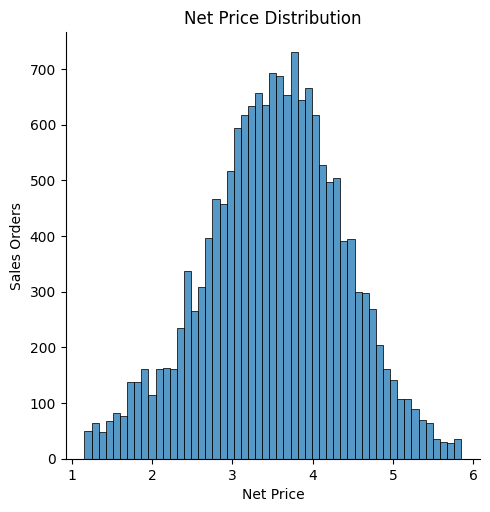

In [78]:
sns.displot(df_final['Net_Price']).set(title='Net Price Distribution', xlabel='Net Price', ylabel='Sales Orders');

In [79]:
df_final['buys_both'].value_counts(normalize=False)
df_final['buys_both'].value_counts(normalize=True)

buys_both
0    10444
1     6051
Name: count, dtype: int64

buys_both
0   0.633
1   0.367
Name: proportion, dtype: float64

In [80]:
df_final.describe()

,Net_Price,buys_both
count,16495.000,16495.000
mean,3.519,0.367
std,0.863,0.482
min,1.157,0.000
25%,2.965,0.000
50%,3.549,0.000
75%,4.099,1.000
max,5.850,1.000


## Next Steps

**Our Target Variable (Buys_Both) is still inbalanced , but the almost 60/40 proportion still can be used for the modeling with an acceptable success rate.

** we will review if the Net_Price has any impact in the modeling, otherwise we will drop it.

** we will look for use additional modeling techniques to reduce the impact of the inbalacing

** the procuremet sequence´s impact is something that we could review as posible additional enginieered feature (Time series)